<a href="https://colab.research.google.com/github/ReneeB-prog/DrleeWebSLM/blob/main/Assignment_7_Data_Wrangling_PipelineReneeBernard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Install and Import all Libraries

In [1]:
# Install additional libraries (if necessary)
!pip install xgboost lightgbm catboost -qqq

import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.linear_model import (LogisticRegression, RidgeClassifier, SGDClassifier, Perceptron)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
                              HistGradientBoostingClassifier, BaggingClassifier, VotingClassifier, StackingClassifier)
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.8 MB/s eta 0:00:00


Step 2: Load the Dataset

In [8]:
import pandas as pd
df = pd.read_csv('breast-cancer (1).csv')
df.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
512,915691,M,13.40,20.52,88.64,556.7,0.11060,0.14690,0.144500,0.081720,...,16.41,29.66,113.30,844.4,0.15740,0.38560,0.51060,0.20510,0.3585,0.11090
350,899187,B,11.66,17.07,73.70,421.0,0.07561,0.03630,0.008306,0.011620,...,13.28,19.74,83.61,542.5,0.09958,0.06476,0.03046,0.04262,0.2731,0.06825
231,88199202,B,11.32,27.08,71.76,395.7,0.06883,0.03813,0.016330,0.003125,...,12.08,33.75,79.82,452.3,0.09203,0.14320,0.10890,0.02083,0.2849,0.07087
519,917080,B,12.75,16.70,82.51,493.8,0.11250,0.11170,0.038800,0.029950,...,14.45,21.74,93.63,624.1,0.14750,0.19790,0.14230,0.08045,0.3071,0.08557
541,921386,B,14.47,24.99,95.81,656.4,0.08837,0.12300,0.100900,0.038900,...,16.22,31.73,113.50,808.9,0.13400,0.42020,0.40400,0.12050,0.3187,0.10230


Code

In [9]:
import pandas as pd

def analyze_columns_for_encoding(df, threshold=50):
    """
    Analyzes the dataframe columns, checking the number of unique values
    and recommending which columns should be dropped, kept, or treated
    before using get_dummies for encoding to avoid dimensionality issues.

    Parameters:
    df : pandas.DataFrame
        The dataframe to analyze.
    threshold : int
        The maximum number of unique values in a column to recommend encoding.

    Returns:
    report : pandas.DataFrame
        A report with recommendations for each column.
    """
    # Create an empty DataFrame for the report
    report = pd.DataFrame(columns=['Column', 'Data Type', 'Unique Values', 'Recommendation'])

    for column in df.columns:
        unique_values = df[column].nunique()
        data_type = df[column].dtype

        # Determine the recommendation based on unique values and data type
        if data_type == 'object' or data_type == 'category':
            if unique_values > threshold:
                recommendation = "Consider Dropping or Encoding Differently (Too many categories)"
            elif unique_values == 2:
                recommendation = "Keep (Binary category)"
            else:
                recommendation = "Keep but beware of dimensionality (Low unique categories)"
        elif data_type in ['int64', 'float64']:
            if unique_values == 2:
                recommendation = "Keep (Binary numeric)"
            else:
                recommendation = "Keep (Continuous)"
        else:
            recommendation = "Consider Dropping (Unknown data type)"

        # Create a new row with the column analysis
        new_row = pd.DataFrame({
            'Column': [column],
            'Data Type': [data_type],
            'Unique Values': [unique_values],
            'Recommendation': [recommendation]
        })

        # Concatenate the new row to the report DataFrame
        report = pd.concat([report, new_row], ignore_index=True)

    return report

# Set your threshold for handling categorical variables
threshold_value = 50

# Analyze the dataframe columns
report = analyze_columns_for_encoding(df, threshold=threshold_value)

# Display the report
report

,Column,Data Type,Unique Values,Recommendation
0,id,int64,569,Keep (Continuous)
1,diagnosis,object,2,Keep (Binary category)
2,radius_mean,float64,456,Keep (Continuous)
3,texture_mean,float64,479,Keep (Continuous)
4,perimeter_mean,float64,522,Keep (Continuous)
5,area_mean,float64,539,Keep (Continuous)
6,smoothness_mean,float64,474,Keep (Continuous)
7,compactness_mean,float64,537,Keep (Continuous)
8,concavity_mean,float64,537,Keep (Continuous)
9,concave points_mean,float64,542,Keep (Continuous)


Step 3: Data Cleaning and Preprocessing

3.1

In [11]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [12]:
# Identify the target column
# Identify the target column ... based on the data that you have... what EXACTLY are you trying to predict... which column?  That is your target!
# Remember that we are scoping this to binary classification - so that column should only have TWO unique values
# I recommend that you RENAME your target column to be named target! --- In this case - the target is actually named target so i don't need to rename

# df = df.rename(columns={'orig_name': 'target'})
# df.head()
# Identify the target column and ensure it's binary (0/1)
# If the column already contains two unique values, we map them to 0 and 1 if necessary

# Get unique values of the target column
unique_values = df['diagnosis'].unique()

# Check if the column has exactly two unique values
if len(unique_values) != 2:
    raise ValueError("diagnosis column does not have exactly two unique values for binary classification.")
else:
    # If values are not already 0 and 1, map them to 0 and 1
    if set(unique_values) != {0, 1}:
        value_map = {unique_values[0]: 0, unique_values[1]: 1}
        df['diagnosis'] = df['diagnosis'].map(value_map)
        print(f"diagnosis values have been mapped to 0 and 1: {value_map}")
    else:
        print("diagnosis values are already in binary (0 and 1).")

# Display the target column and verify the changes
print(f"diagnosis column: {df['diagnosis'].name}")
print(df['diagnosis'].unique())

diagnosis values have been mapped to 0 and 1: {'M': 0, 'B': 1}
diagnosis column: diagnosis
[0 1]


3.2 Validate Data Types and Inspect the Dataset Structure

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

3.3: Handling Unique Values in a Dataset and Duplicates

In [14]:
# Check the number of unique values per column
print(df.nunique())

# Remove duplicate rows
df = df.drop_duplicates()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

4: Check for Balanced target

In [19]:
# Check if the target class is balanced
print(df['diagnosis'].value_counts())

diagnosis
1    357
0    212
Name: count, dtype: int64


5: All Columns are numerical

6: Handle Missing Data

In [21]:
# Handle Missing Data
# Check for missing values
print("Rows/Cols before: " + str(df.shape))
print(df.isnull().sum())

# Drop rows with missing values
df = df.dropna()  # Obviously - you have to count the number before and after
print("Rows/Cols after: " + str(df.shape))

Rows/Cols before: (569, 32)
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
Rows/Cols after: (569, 32)


7/8 8: Encode Categorical Variables

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [23]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Step 9: Normalize or Scale our Data

In [24]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=['diagnosis']))
X = pd.DataFrame(scaled_features, columns=df.drop(columns=['diagnosis']).columns)
y = df['diagnosis']

Step 10: Create a data checkpoint

In [25]:
df_run1 = df.to_csv("/kaggle/df_run1.csv")

Step 11: Separate Features and Target and do a Train Test Split

In [26]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 12: Define a BASE set of AI Algorithms that you want to Train

In [27]:
# Define base classifiers for Voting and Stacking
base_classifiers = [
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier()),
    ('svc', SVC(probability=True))  # Probability required for AUC-ROC
]

Step 13: Combine ALL classifiers

In [28]:
# Combine all classifiers, comment out those you don't want to use
classifiers = [
    LogisticRegression(), RidgeClassifier(), SGDClassifier(), Perceptron(),
    SVC(probability=True), KNeighborsClassifier(), RadiusNeighborsClassifier(),
    GaussianProcessClassifier(), DecisionTreeClassifier(), RandomForestClassifier(),
    GradientBoostingClassifier(), AdaBoostClassifier(), HistGradientBoostingClassifier(),
    BaggingClassifier(),
    VotingClassifier(estimators=base_classifiers, voting='soft'),  # Voting Classifier with base classifiers
    StackingClassifier(estimators=base_classifiers),  # Stacking Classifier with base classifiers
    MLPClassifier(),
    GaussianNB(),
    xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'), lgb.LGBMClassifier(), CatBoostClassifier(verbose=0)
]

Step 14: Train ALL algos at once

LogisticRegression()
	Training time: 0.079s
	Prediction time: 0.012s
	Accuracy: 0.974
	Precision: 0.972
	Recall: 0.986
	F1 Score: 0.979
	ROC-AUC Score: 0.997

Classification Report for LogisticRegression:

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



/tmp/ipython-input-3904260354.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, row], ignore_index=True)


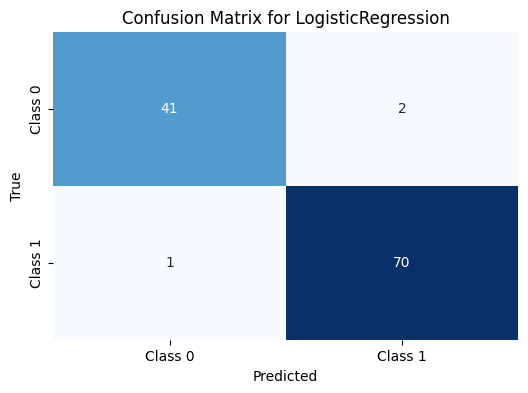

RidgeClassifier()
	Training time: 0.039s
	Prediction time: 0.008s
	Accuracy: 0.965
	Precision: 0.959
	Recall: 0.986
	F1 Score: 0.972

Classification Report for RidgeClassifier:

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



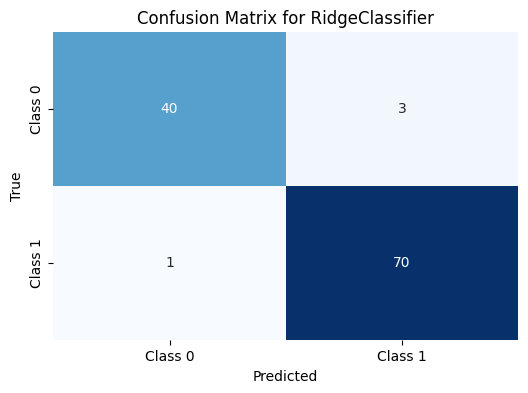

SGDClassifier()
	Training time: 0.007s
	Prediction time: 0.002s
	Accuracy: 0.930
	Precision: 0.957
	Recall: 0.930
	F1 Score: 0.943

Classification Report for SGDClassifier:

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        43
           1       0.96      0.93      0.94        71

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



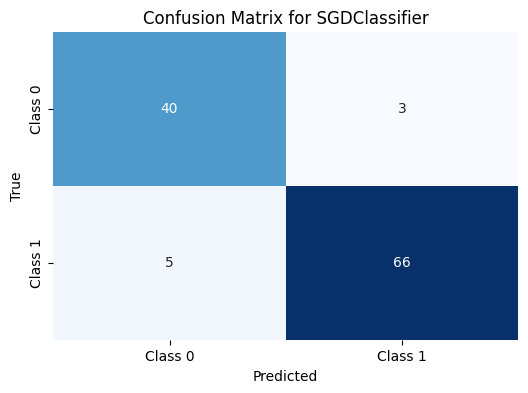

Perceptron()
	Training time: 0.013s
	Prediction time: 0.007s
	Accuracy: 0.956
	Precision: 0.985
	Recall: 0.944
	F1 Score: 0.964

Classification Report for Perceptron:

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        43
           1       0.99      0.94      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



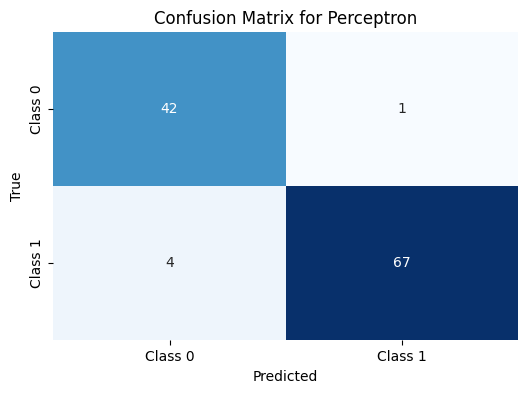

SVC(probability=True)
	Training time: 0.046s
	Prediction time: 0.030s
	Accuracy: 0.982
	Precision: 0.973
	Recall: 1.000
	F1 Score: 0.986
	ROC-AUC Score: 0.997

Classification Report for SVC:

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



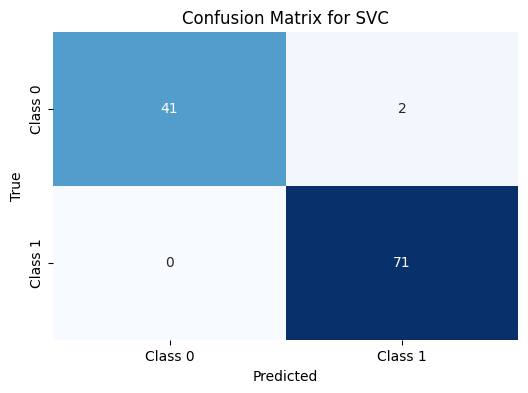

KNeighborsClassifier()
	Training time: 0.006s
	Prediction time: 0.071s
	Accuracy: 0.947
	Precision: 0.958
	Recall: 0.958
	F1 Score: 0.958
	ROC-AUC Score: 0.981

Classification Report for KNeighborsClassifier:

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



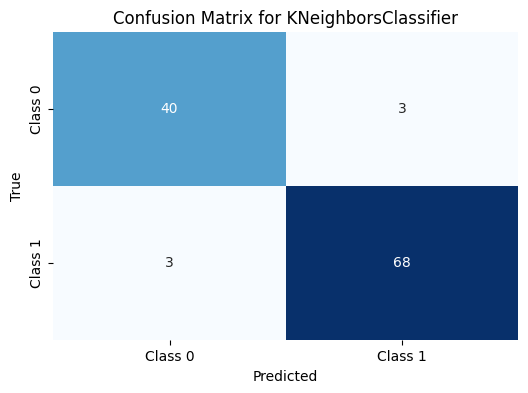

Model RadiusNeighborsClassifier() failed: No neighbors found for test samples array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113]), you can try using larger radius, giving a label for outliers, or considering removing them from your dataset.

GaussianProcessClassifier()
	Training time: 0.084s
	Prediction time: 0.020s
	Accuracy: 0.947
	Precision: 0.945
	Recall: 0.972
	F1 Score: 0.958
	ROC-AUC Score: 0.957

Classifica

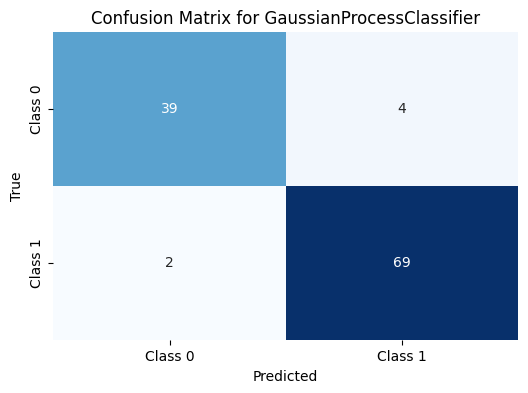

DecisionTreeClassifier()
	Training time: 0.016s
	Prediction time: 0.003s
	Accuracy: 0.939
	Precision: 0.957
	Recall: 0.944
	F1 Score: 0.950
	ROC-AUC Score: 0.937

Classification Report for DecisionTreeClassifier:

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        43
           1       0.96      0.94      0.95        71

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



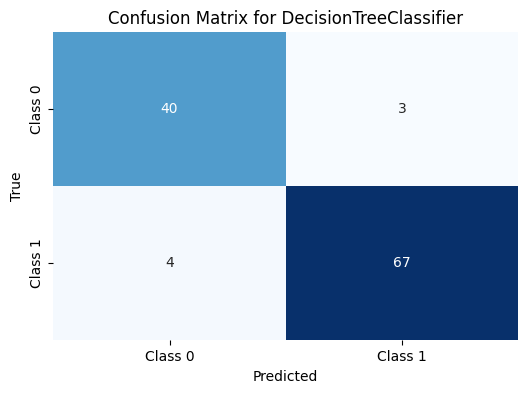

RandomForestClassifier()
	Training time: 0.264s
	Prediction time: 0.016s
	Accuracy: 0.965
	Precision: 0.959
	Recall: 0.986
	F1 Score: 0.972
	ROC-AUC Score: 0.996

Classification Report for RandomForestClassifier:

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



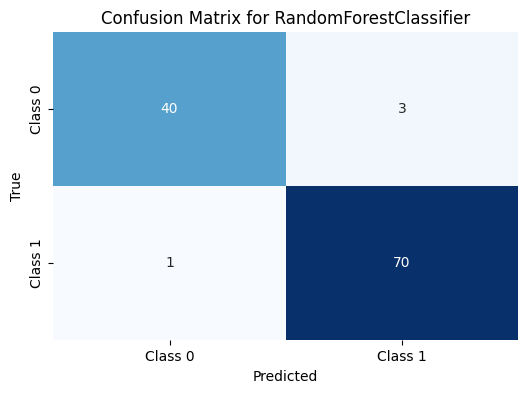

GradientBoostingClassifier()
	Training time: 0.830s
	Prediction time: 0.004s
	Accuracy: 0.947
	Precision: 0.958
	Recall: 0.958
	F1 Score: 0.958
	ROC-AUC Score: 0.996

Classification Report for GradientBoostingClassifier:

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



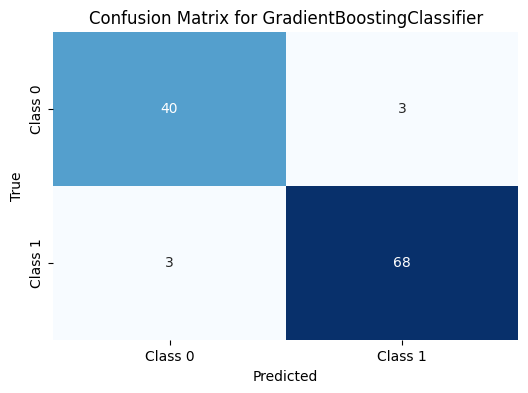

AdaBoostClassifier()
	Training time: 0.247s
	Prediction time: 0.022s
	Accuracy: 0.965
	Precision: 0.972
	Recall: 0.972
	F1 Score: 0.972
	ROC-AUC Score: 0.995

Classification Report for AdaBoostClassifier:

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



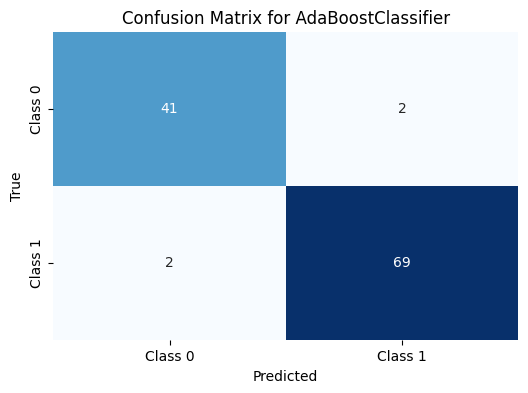

HistGradientBoostingClassifier()
	Training time: 0.256s
	Prediction time: 0.007s
	Accuracy: 0.947
	Precision: 0.958
	Recall: 0.958
	F1 Score: 0.958
	ROC-AUC Score: 0.995

Classification Report for HistGradientBoostingClassifier:

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



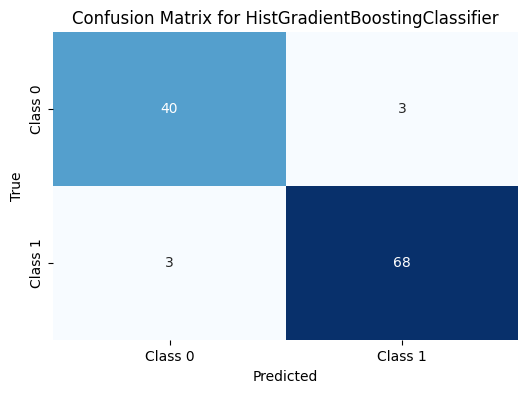

BaggingClassifier()
	Training time: 0.093s
	Prediction time: 0.006s
	Accuracy: 0.956
	Precision: 0.958
	Recall: 0.972
	F1 Score: 0.965
	ROC-AUC Score: 0.969

Classification Report for BaggingClassifier:

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



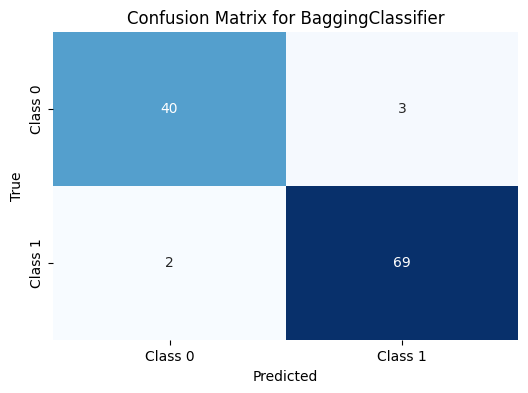

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(probability=True))],
                 voting='soft')
	Training time: 0.357s
	Prediction time: 0.025s
	Accuracy: 0.974
	Precision: 0.972
	Recall: 0.986
	F1 Score: 0.979
	ROC-AUC Score: 0.997

Classification Report for VotingClassifier:

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



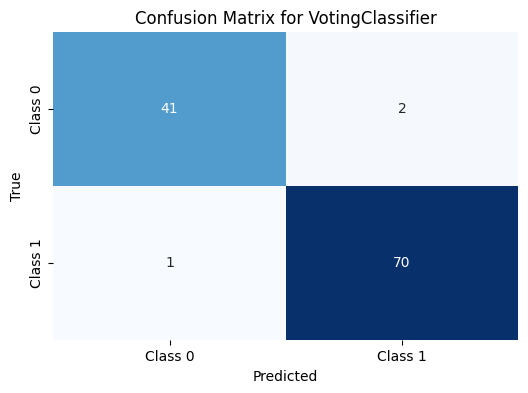

StackingClassifier(estimators=[('lr', LogisticRegression()),
                               ('rf', RandomForestClassifier()),
                               ('svc', SVC(probability=True))])
	Training time: 1.774s
	Prediction time: 0.037s
	Accuracy: 0.974
	Precision: 0.972
	Recall: 0.986
	F1 Score: 0.979
	ROC-AUC Score: 0.997

Classification Report for StackingClassifier:

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



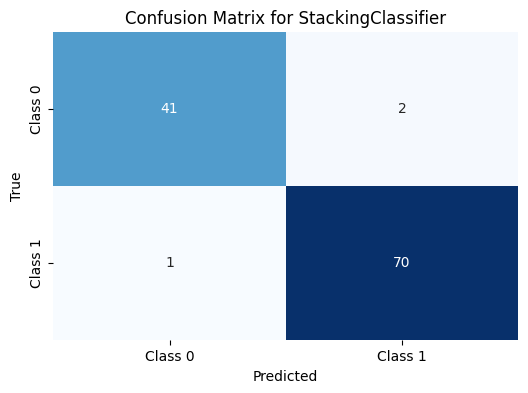

MLPClassifier()
	Training time: 0.537s
	Prediction time: 0.005s
	Accuracy: 0.965
	Precision: 0.972
	Recall: 0.972
	F1 Score: 0.972
	ROC-AUC Score: 0.994

Classification Report for MLPClassifier:

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


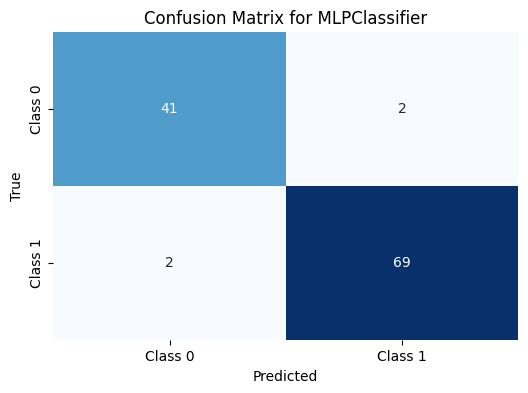

GaussianNB()
	Training time: 0.004s
	Prediction time: 0.004s
	Accuracy: 0.965
	Precision: 0.959
	Recall: 0.986
	F1 Score: 0.972
	ROC-AUC Score: 0.997

Classification Report for GaussianNB:

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



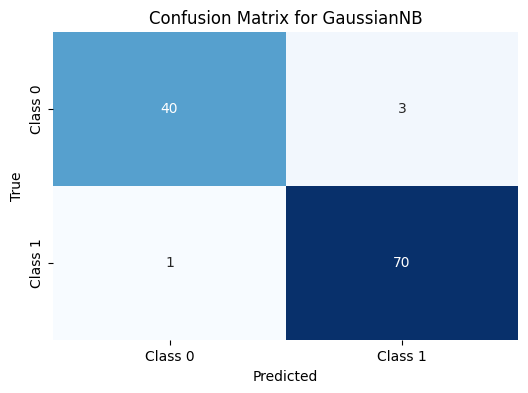

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [00:36:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)
	Training time: 0.167s
	Prediction time: 0.007s
	Accuracy: 0.956
	Precision: 0.958
	Recall: 0.972
	F1 Score: 0.965
	ROC-AUC Score: 0.995

Classification Report for XGBClassifier:

              precision    recall  f1-sc

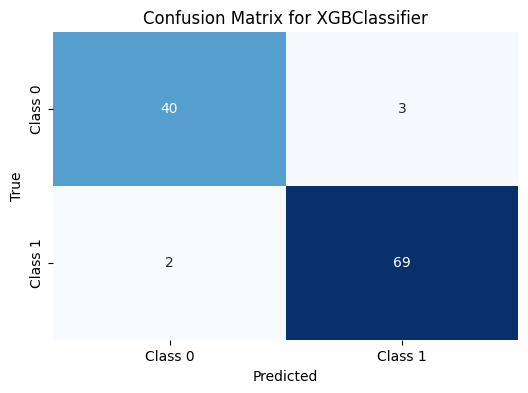

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000288 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4693
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628571 -> initscore=0.526093
[LightGBM] [Info] Start training from score 0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

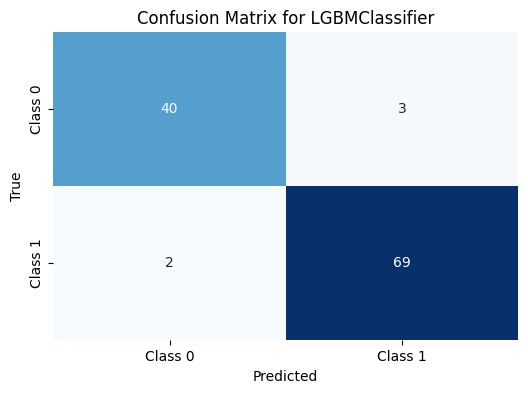

	Training time: 10.200s
	Prediction time: 0.004s
	Accuracy: 0.965
	Precision: 0.959
	Recall: 0.986
	F1 Score: 0.972
	ROC-AUC Score: 0.997

Classification Report for CatBoostClassifier:

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



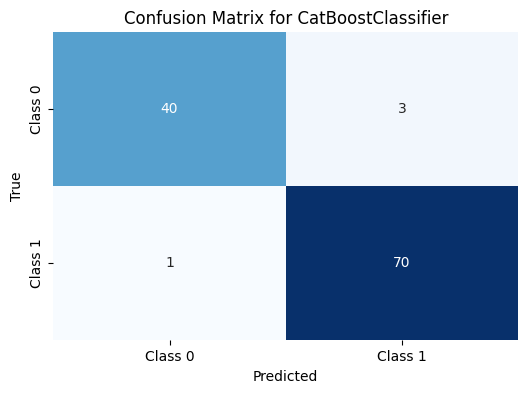

In [29]:
# DataFrame to store ROC-AUC scores
results_df = pd.DataFrame(columns=['Model', 'ROC-AUC Score'])

# Iterate over models and evaluate performance
for model in classifiers:
    try:
        start = time.time()
        model.fit(X_train, y_train)
        train_time = time.time() - start

        start = time.time()
        y_pred = model.predict(X_test)
        y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
        predict_time = time.time() - start

        # Collect performance metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_prob) if y_pred_prob is not None else None

        # Print performance metrics
        print(model)
        print(f"\tTraining time: {train_time:.3f}s")
        print(f"\tPrediction time: {predict_time:.3f}s")
        print(f"\tAccuracy: {accuracy:.3f}")
        print(f"\tPrecision: {precision:.3f}")
        print(f"\tRecall: {recall:.3f}")
        print(f"\tF1 Score: {f1:.3f}")
        if roc_auc is not None:
            print(f"\tROC-AUC Score: {roc_auc:.3f}")
        print()

        # Append the ROC-AUC score to the results dataframe (if available)
        if roc_auc is not None:
            row = pd.DataFrame({'Model': [type(model).__name__], 'ROC-AUC Score': [roc_auc]})
            results_df = pd.concat([results_df, row], ignore_index=True)

        # Classification report and confusion matrix
        print(f"Classification Report for {type(model).__name__}:\n")
        print(classification_report(y_test, y_pred))

        # Plot confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
        plt.title(f'Confusion Matrix for {type(model).__name__}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

    except Exception as e:
        print(f"Model {model} failed: {e}")
        print()

Step 15: Compare Performance Metrics and Select the Best Couple of Models.

                             Model  ROC-AUC Score
13                      GaussianNB       0.997380
0               LogisticRegression       0.997380
11              StackingClassifier       0.997380
1                              SVC       0.997052
10                VotingClassifier       0.997052
16              CatBoostClassifier       0.996725
6       GradientBoostingClassifier       0.996397
5           RandomForestClassifier       0.995742
7               AdaBoostClassifier       0.995414
15                  LGBMClassifier       0.995414
14                   XGBClassifier       0.995087
8   HistGradientBoostingClassifier       0.994759
12                   MLPClassifier       0.994432
2             KNeighborsClassifier       0.981166
9                BaggingClassifier       0.968883
3        GaussianProcessClassifier       0.957091
4           DecisionTreeClassifier       0.936947


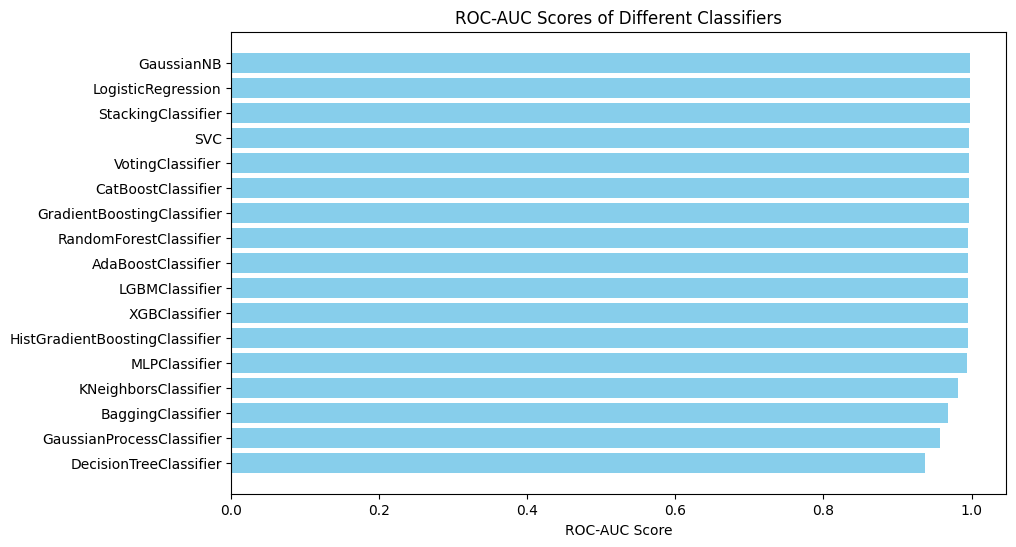

In [30]:
# Sort the DataFrame by ROC-AUC score
results_df = results_df.sort_values(by='ROC-AUC Score', ascending=False)

# Display the sorted ROC-AUC scores
print(results_df)

# Plot a bar chart for ROC-AUC scores
plt.figure(figsize=(10, 6))
plt.barh(results_df['Model'], results_df['ROC-AUC Score'], color='skyblue')
plt.xlabel('ROC-AUC Score')
plt.title('ROC-AUC Scores of Different Classifiers')
plt.gca().invert_yaxis()
plt.show()